In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_excel('colorado_final.xlsx')

In [3]:
df.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Assault', 'Property Crime', 'Burgalry', 'Larcency', 'Motor', 'Arson']

In [4]:
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor,Arson
0,Arvada,110792,163,0,33,34,96,2666,331,2138,197,22
1,Aspen,6685,14,0,5,0,9,314,17,286,11,0
2,Ault,1565,0,0,0,0,0,2,0,0,2,0
3,Aurora,343484,1436,23,224,468,721,10786,1981,7805,1000,80
4,Avon,6336,9,0,3,0,6,140,12,124,4,1


In [5]:
features = pd.get_dummies(df['Murder'])
features[M

In [6]:
features['Robbery_Rate'] = np.where(df['Robbery'] >= 1, 1, 0)

In [7]:
features['Population_Square'] = df['Population'] ** 2

In [8]:
features['Population_Segment'] = df.loc[df['Population'] < 200000, 'Population']

## Vanilla Regression: 

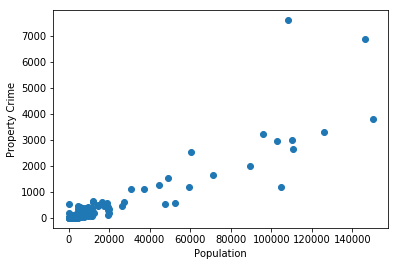

In [9]:
x = features['Population_Segment']
y = df['Property Crime']
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

In [10]:
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [14]:
#Comparing Property Crime to Murder and Robbery and Population 

regr = linear_model.LinearRegression()
Y = df['Property Crime'].values.reshape(-1, 1)
X = df[['Population', 'Murder', 'Robbery']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))
#plt.scatter(X, Y, color='black')
predictions = regr.predict(X)
#plt.plot(X, regr.predict(X), color='blue', linewidth=3)
#plt.show()


Coefficients: 
 [[ 0.02873714 14.29751819  5.05322771]]

Intercept: 
 [-38.39153525]

R-squared:
0.9630837826662033


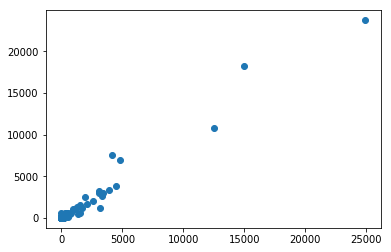

In [12]:
plt.scatter(predictions, Y)
plt.show()

## Ridge Regression

In [56]:
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, 1:11].copy()


In [57]:
df_test.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor,Arson
67,Hayden,1780,0,0,0,0,0,22,9,10,3,0
68,Hotchkiss,917,2,0,1,0,1,21,3,13,5,0
69,Hudson,2390,6,0,2,0,4,30,1,24,5,0
70,Idaho Springs,1683,16,0,3,0,13,57,8,48,1,0
71,Ignacio,709,0,0,0,0,0,0,0,0,0,0


In [58]:
df_train.head()

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor
0,110792,163,0,33,34,96,2666,331,2138,197
1,6685,14,0,5,0,9,314,17,286,11
2,1565,0,0,0,0,0,2,0,0,2
3,343484,1436,23,224,468,721,10786,1981,7805,1000
4,6336,9,0,3,0,6,140,12,124,4


In [59]:
regr1 = linear_model.LinearRegression()
Y_train = df_train['Property Crime'].values.reshape(-1, 1)

In [60]:
X_train = df_train.loc[:, ~(df_train.columns).isin(['Property Crime'])]

In [61]:
X_train.head()

,Population,Violent Crime,Murder,Rape,Robbery,Assault,Burgalry,Larcency,Motor
0,110792,163,0,33,34,96,331,2138,197
1,6685,14,0,5,0,9,17,286,11
2,1565,0,0,0,0,0,0,0,2
3,343484,1436,23,224,468,721,1981,7805,1000
4,6336,9,0,3,0,6,12,124,4


In [62]:
df_train['Population_Squared'] = df_train['Population'] * df_train['Population']

In [63]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['Property Crime'])]

In [64]:
Y_test = df_test['Property Crime'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['Property Crime'])]


In [65]:
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['Property Crime'])]

In [66]:
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))



R-squared simple model:
1.0


In [67]:
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['Property Crime'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))



R-squared complex model:
1.0


In [68]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

0.999999999999324
[ 1.46475958e-09  1.12747519e-04  3.29590723e-05  2.49273614e-04
 -1.00303382e-04 -6.91829957e-05  1.00001121e+00  9.99991401e-01
  9.99931915e-01]


In [71]:
ridgeregrBig = linear_model.Ridge(alpha=5, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]


0.9999999999992037


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.18641e-23): result may not be accurate.
  overwrite_a=True).T


## Lasso 

In [73]:
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.9998974811895679

Parameter estimates for the model with few features:
[ 2.25201403e-04  8.72710332e-01 -1.81387134e+01  3.09365146e+00
  2.67168352e-01 -8.58725157e-01  1.70890518e+00  8.14063584e-01
  2.45275591e-03  5.61249852e+00]


In [74]:
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)


R² for the model with many features:
0.9998742769707017

Parameter estimates for the model with many features:
[ 6.12152270e-04  8.49751618e-01 -1.77148355e+01  1.50400449e+00
  8.96839299e-01 -6.56450733e-01  1.88265739e+00  7.73895861e-01
  5.37808110e-01 -6.32566922e-09  2.54570009e+00]
